In [3]:
import numpy as np
import pandas as pd
import re
import string as strg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import nltk

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

from skimage import io
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation

df_r = pd.read_csv('E:\DataforLab/toyota.csv')
df_r = df_r.drop(columns=['model'])
df_r.head(10)

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,2017,17498,Manual,36284,Petrol,145,36.2,2.0
5,2017,15998,Manual,26919,Petrol,260,36.2,2.0
6,2017,18522,Manual,10456,Petrol,145,36.2,2.0
7,2017,18995,Manual,12340,Petrol,145,36.2,2.0
8,2020,27998,Manual,516,Petrol,150,33.2,2.0
9,2016,13990,Manual,37999,Petrol,265,36.2,2.0


In [4]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          6738 non-null   int64  
 1   price         6738 non-null   int64  
 2   transmission  6738 non-null   object 
 3   mileage       6738 non-null   int64  
 4   fuelType      6738 non-null   object 
 5   tax           6738 non-null   int64  
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 421.2+ KB


In [5]:
df_f_col = list(['transmission','fuelType'])
df_c = df_r.copy()
df_c = df_c[df_c['fuelType'] != 'Other']

labels = df_c['fuelType']

for col in df_f_col:
    i = 0
    unique = df_c[col].unique()

    for to_replace_val in unique:
        df_c[col] = df_c[col].replace(to_replace=to_replace_val, value=i, regex=True)
        i = i+1
    df_c[col] = df_c[col].astype("int32")

df_c.head(10)

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2016,16000,0,24089,0,265,36.2,2.0
1,2017,15995,0,18615,0,145,36.2,2.0
2,2015,13998,0,27469,0,265,36.2,2.0
3,2017,18998,0,14736,0,150,36.2,2.0
4,2017,17498,0,36284,0,145,36.2,2.0
5,2017,15998,0,26919,0,260,36.2,2.0
6,2017,18522,0,10456,0,145,36.2,2.0
7,2017,18995,0,12340,0,145,36.2,2.0
8,2020,27998,0,516,0,150,33.2,2.0
9,2016,13990,0,37999,0,265,36.2,2.0


In [6]:
U = df_c.fuelType
X = df_c.drop(['fuelType','mileage','tax'], axis=1)

#X_train_, X_test_, y_train, y_test = train_test_split(X, U, test_size=0.5, random_state=101)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_std)

exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

new_X = pd.DataFrame(X_pca)
new_X.head()

#X_train = scaler.transform(X_train_) 
#X_test = scaler.transform(X_test_)

,0,1,2,3,4
0,0.542667,-1.473487,1.680657,0.510812,-0.047523
1,0.633839,-1.716559,1.355059,0.468672,-0.220491
2,0.251364,-1.168144,2.032835,0.490964,-0.103941
3,0.933289,-1.809732,1.315289,0.561423,0.122732
4,0.783713,-1.763192,1.335154,0.515094,-0.048708


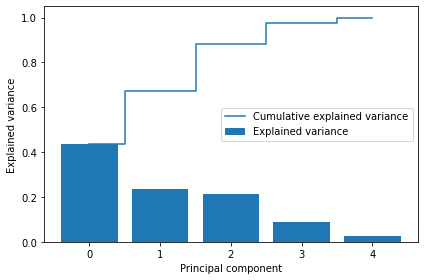

In [7]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

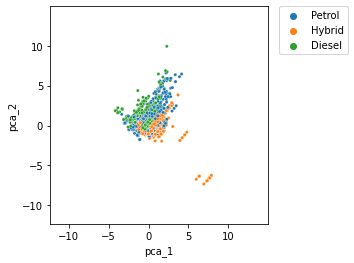

In [18]:
pca2=PCA(n_components=2)
pca_result2 = pca2.fit_transform(X) #without scaler

pca_result_df = pd.DataFrame({'pca_1': X_pca[:,1], 'pca_2': X_pca[:,2], 'label': labels})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (X_pca.min()-5, X_pca.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

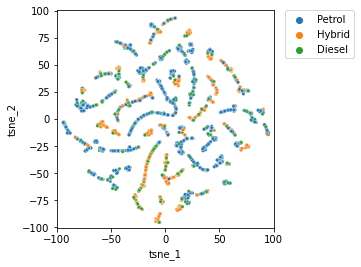

In [20]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': labels})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

Done in 0.304s.
Done in 0.222s.
Done in 0.176s.
Done in 0.163s.


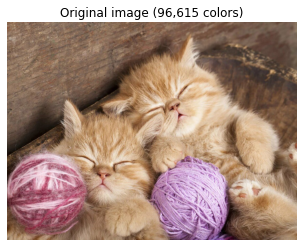

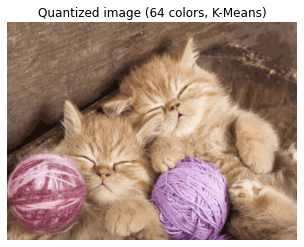

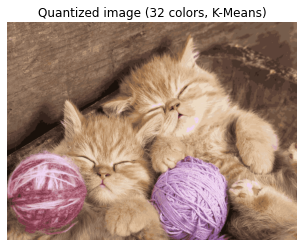

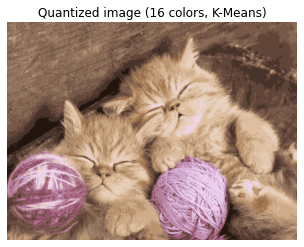

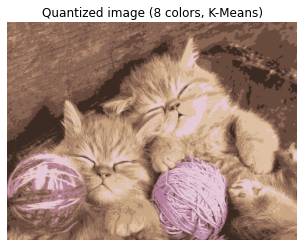

In [122]:
n_colors = 64
from time import time

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

def n_colors_change(img, n_colors):
    w, h, d = original_shape = tuple(img.shape)
    
    reshaped_img = np.reshape(img, (w * h, d))
    img_sample = shuffle(reshaped_img, random_state=0, n_samples=1000)
    kmeans_method = KMeans(n_clusters=n_colors, random_state=0).fit(img_sample)
    labels = kmeans_method.predict(reshaped_img)
    result_image = recreate_image(kmeans_method.cluster_centers_, labels, w, h)
    return result_image

kotyata = io.imread('E:\DataforLab/kotiki.jpg')
kotyata = np.array(kotyata, dtype=np.float64) / 255


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(kotyata)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
t0 = time()
plt.imshow(n_colors_change(kotyata, n_colors))
print(f"Done in {time() - t0:0.3f}s.")

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({int(n_colors/2)} colors, K-Means)")
t0 = time()
plt.imshow(n_colors_change(kotyata, int(n_colors/2)))
print(f"Done in {time() - t0:0.3f}s.")

plt.figure(4)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({int(n_colors/4)} colors, K-Means)")
t0 = time()
plt.imshow(n_colors_change(kotyata, int(n_colors/4)))
print(f"Done in {time() - t0:0.3f}s.")

plt.figure(5)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({int(n_colors/8)} colors, K-Means)")
t0 = time()
plt.imshow(n_colors_change(kotyata, int(n_colors/8)))
print(f"Done in {time() - t0:0.3f}s.")

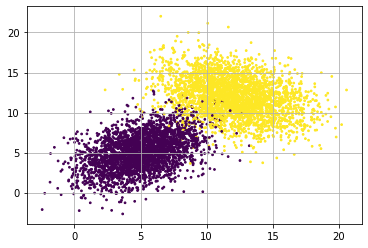

In [149]:
num_points = 3000


mean_1 = [5, 5]
cov_1 = [[5, 2], [2, 5]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)

mean_2 = [12, 12]
cov_2 = [[7, -2], [-2, 6]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)

X = np.concatenate([x_1, x_2])
u = np.array([0] * num_points + [1] *  num_points) 
X, u = shuffle(X, u, random_state=0)


plt.scatter(X[:, 0], X[:, 1], s = 3, c = u)
plt.grid()

In [150]:
for i in range(2, 7):
    gmm = GaussianMixture(n_components=i, covariance_type='full')
    gmm_labels = gmm.fit_predict(X)
    silhouette_avg = silhouette_score(X, gmm_labels)
    print("For n_clusters =", i, " silhouette average:", silhouette_avg)

For n_clusters = 2  silhouette average: 0.5875799064720045
For n_clusters = 3  silhouette average: 0.41959066445674276
For n_clusters = 4  silhouette average: 0.366522591029976
For n_clusters = 5  silhouette average: 0.3382784322726256
For n_clusters = 6  silhouette average: 0.31038036322789797


In [151]:
GMM = GaussianMixture(n_components=2, covariance_type='full')
GMM.fit(X)
print('means ')
print(GMM.means_)
print('covariances ')
print(GMM.covariances_)

means 
[[ 5.01288593  5.02153044]
 [11.99082333 11.96866808]]
covariances 
[[[ 5.18059442  2.02446459]
  [ 2.02446459  4.75091311]]

 [[ 7.10182833 -1.98335042]
  [-1.98335042  5.80786255]]]


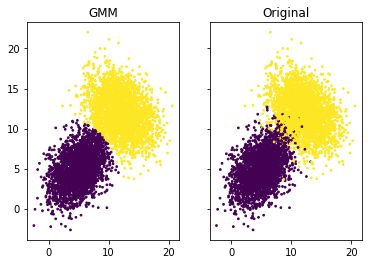

In [152]:
labels = GMM.predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('GMM')
ax1.scatter(X[:,0], X[:,1], c=labels, s=3)


ax2.set_title("Original")
ax2.scatter(X[:,0], X[:,1], c=u, s=3)

means 
[[11.79509511 11.75601268]
 [ 4.79309374  4.82294882]]
covariances 
[6.93378684 4.39570293]


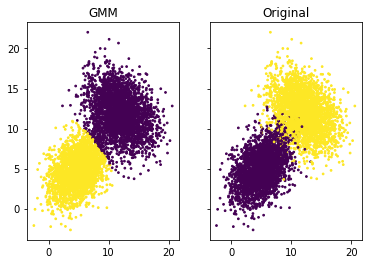

In [154]:
GMM = GaussianMixture(n_components=2, covariance_type='spherical')
GMM.fit(X)

labels = GMM.predict(X)

print('means ')
print(GMM.means_)
print('covariances ')
print(GMM.covariances_)


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('GMM')
ax1.scatter(X[:,0], X[:,1], c=labels, s=3)
ax2.set_title("Original")
ax2.scatter(X[:,0], X[:,1], c=y, s=3)

In [8]:
text_data = pd.read_csv('E:\DataforLab/tripadvisor_hotel_reviews.csv', encoding='latin-1')


text_data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [9]:
text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [11]:
#nltk.download('stopwords')

def clean_text(text):
    text = text.lower()
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(strg.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    stop_words = stopwords.words("english")
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text
for i in range(text_data['Review'].shape[0]):
    text_data.loc[i, 'Review'] = clean_text(text_data.loc[i, 'Review'])

text_data['Review'].head(10)

0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice rooms experience hotel monaco seattle goo...
3    unique great stay wonderful time hotel monaco ...
4    great stay great stay went seahawk game awesom...
5    love monaco staff husband stayed hotel crazy w...
6    cozy stay rainy city husband spent nights mona...
7    excellent staff housekeeping quality hotel cho...
8    hotel stayed hotel monaco cruise rooms generou...
9    excellent stayed hotel monaco past w e delight...
Name: Review, dtype: object

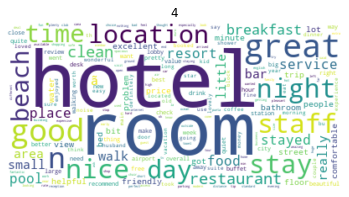

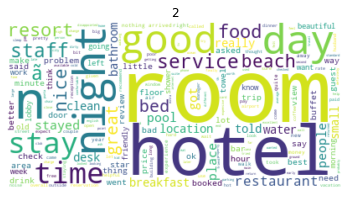

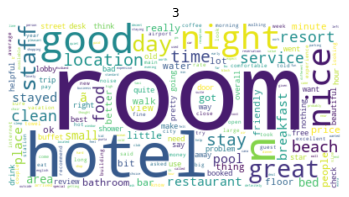

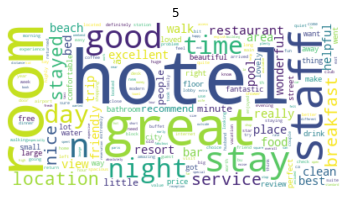

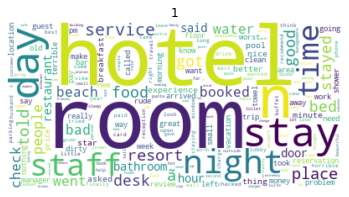

In [145]:
def visualize_class_words(text_data, class_label):
    text_type = ' '
    
    for row in v:
        text_type+=(str(row))+' '
        
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text_type)
    plt.imshow(word_cloud, interpolation='bilinear')
    
    plt.title(class_label)
    plt.axis("off")
    plt.show()

unique = text_data['Rating'].unique()
    
for i in unique:
    visualize_class_words(text_data, i)

In [40]:
X_train, X_test = train_test_split(text_data, test_size=0.5, random_state=101)

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=0.05, decode_error='ignore', encoding=None)

X_train_bin = X_train[X_train.Rating == 1]
X_train_bin_5 = X_train[X_train.Rating == 5]

X_train_bin = pd.concat([X_train_bin, X_train_bin_5])
X_train_bin = X_train_bin.sample(frac=1).reset_index(drop=True)

X_test_bin = X_test[X_test.Rating == 1]
X_test_bin_5 = X_test[X_test.Rating == 5]

X_test_bin = pd.concat([X_test_bin, X_test_bin_5])
X_test_bin = X_test_bin.sample(frac=1).reset_index(drop=True)

print(X_test_bin)

tfidf_train = tfidf_vectorizer.fit_transform(X_train_bin['Review'])
tfidf_test =  tfidf_vectorizer.transform(X_test_bin['Review'])


clf = LogisticRegression().fit(tfidf_train, X_train_bin['Rating'])

predicted = clf.predict(tfidf_test)
print(classification_report(X_test_bin['Rating'], predicted))


                                                 Review  Rating
0     raffles lived expectations stayed honeymoon fa...       5
1     n arrived hotel pm sat night checked upgraded ...       1
2     stay away hilton best advice stay reviews ment...       1
3     great resort caribe club princesslinda dave ma...       5
4     great hotel stayed sheraton town wedding churc...       5
...                                                 ...     ...
5254  paid star received star arrived nov th beautif...       1
5255  loved hotel simple loved hotel loved bar resta...       5
5256  wonderful hotel stayed aqua palms spa days cel...       5
5257  excellent choice excellent stay affinia dumont...       5
5258  like star hotel grounds beach nice best say ro...       1

[5259 rows x 2 columns]
              precision    recall  f1-score   support

           1       0.93      0.71      0.80       714
           5       0.96      0.99      0.97      4545

    accuracy                           0.95

In [44]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train.Review)
tfidf_test =  tfidf_vectorizer.transform(X_test.Review)

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
clf = dtree.fit(tfidf_train, X_train.Rating)
predictions = dtree.predict(tfidf_test)

print(classification_report(X_test.Rating, predictions))

              precision    recall  f1-score   support

           1       0.33      0.32      0.32       714
           2       0.19      0.17      0.18       910
           3       0.20      0.21      0.21      1091
           4       0.36      0.37      0.36      2986
           5       0.58      0.58      0.58      4545

    accuracy                           0.42     10246
   macro avg       0.33      0.33      0.33     10246
weighted avg       0.42      0.42      0.42     10246



In [42]:
def plot_top_words(model, feature_names, title, n_top_words=10):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

[4 2 3 5 1]


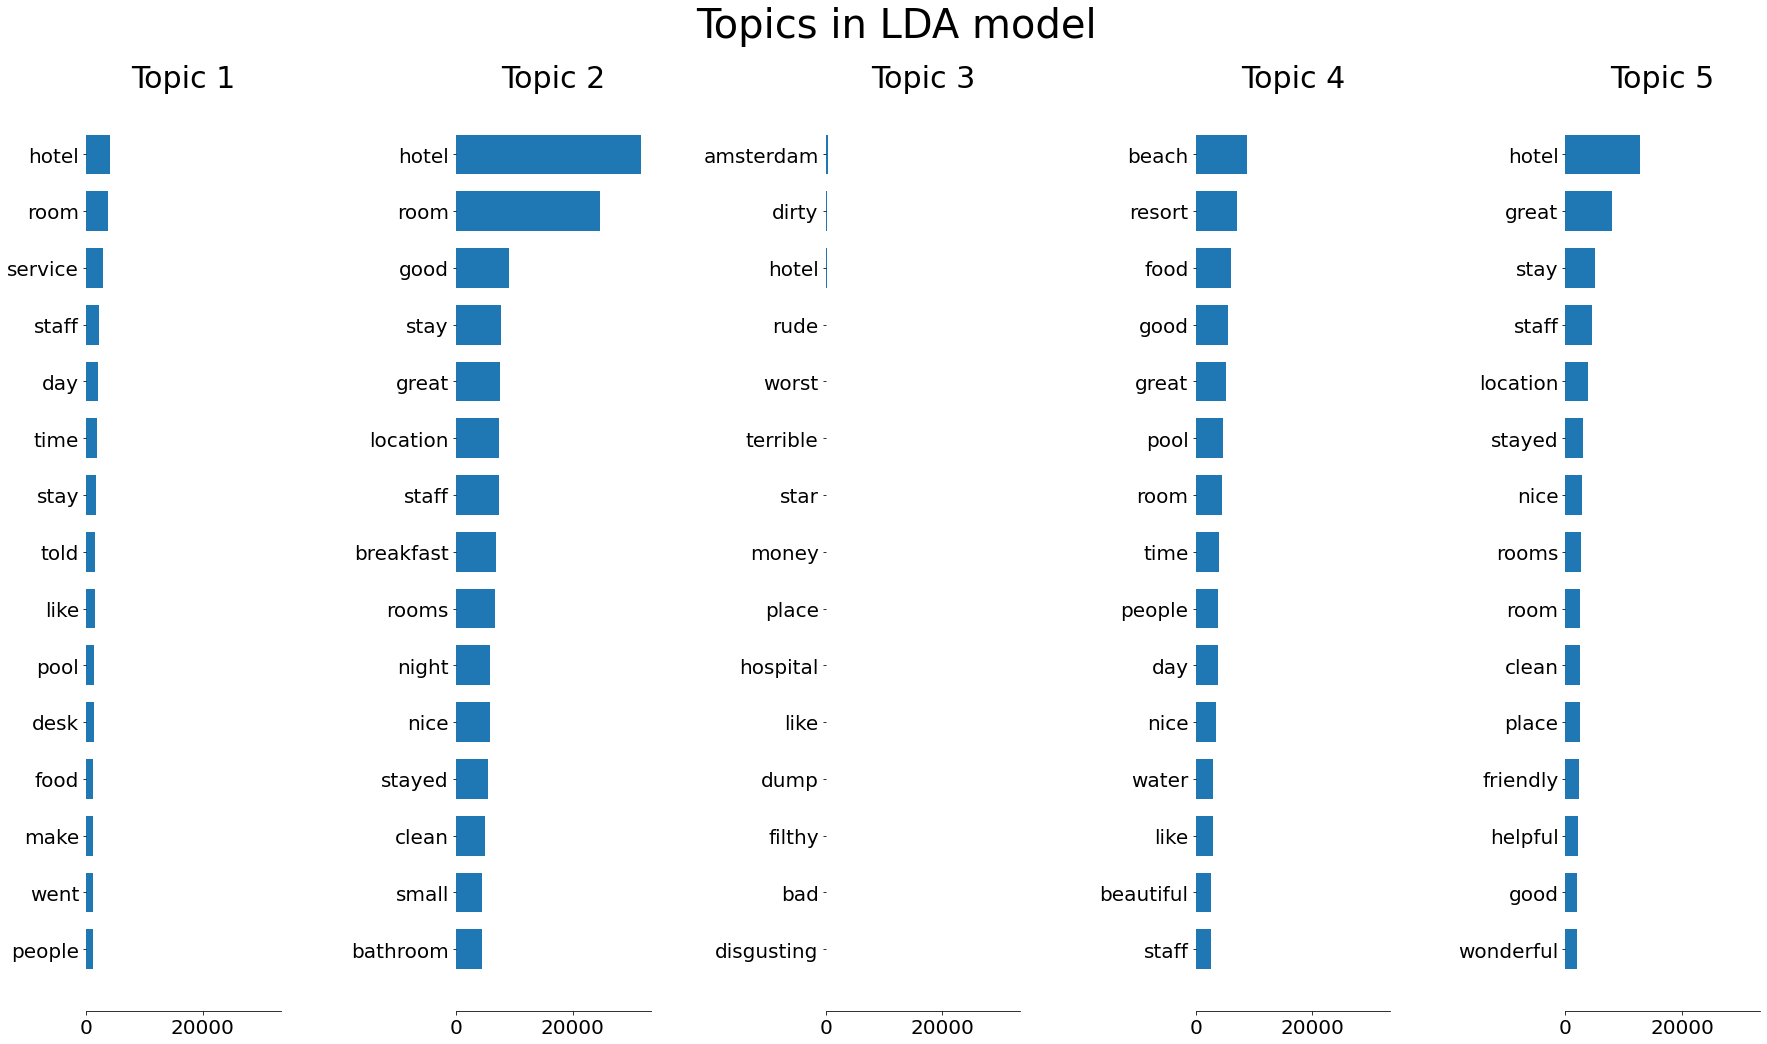

In [47]:
print(text_data['Rating'].unique())

vectorizer = CountVectorizer(stop_words='english')
data_vectorized = vectorizer.fit_transform(text_data['Review'])

lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(data_vectorized)

feature_names = vectorizer.get_feature_names()
plot_top_words(lda, feature_names, 'Topics in LDA model', n_top_words=15)